# Coding II -- Day 7 -- Cool plotting packages
-- Haynes Stephens -- haynes13@uchicago.edu

**NOTE**: If you're following along to a live lecture, don't worry about reading the text in this notebook. I'll summarize the text as we move forward, and it's there in case you need to go back and refresh your memory at a later time.

# Section 1: Getting Started

Today we're going to start with a quick tour of some of the plotting tools available in Python. These tools are not meant to create publication-quality figures. Instead, they're to help you make amazing exploratory and explantory figures in a fraction of the time it would take using `matplotlib`. This figures are also useful for presentations. 

* We'll use the packages `seaborn` and `plotly express` to help plot *tabular data*. 
* Then we'll use `xarray plot` and `geoviews` for plotting *gridded data*. 
* Time permitting, we'll go through some extra sections for each plotting package and even look into some ways to customize in `matplotlib` for when we want to start making those publication-quality figures.


Note: we'll be using mostly datasets that come pre-loaded in these packages, so don't be surprised if we switch from discussing penguins to surface temperatures. 

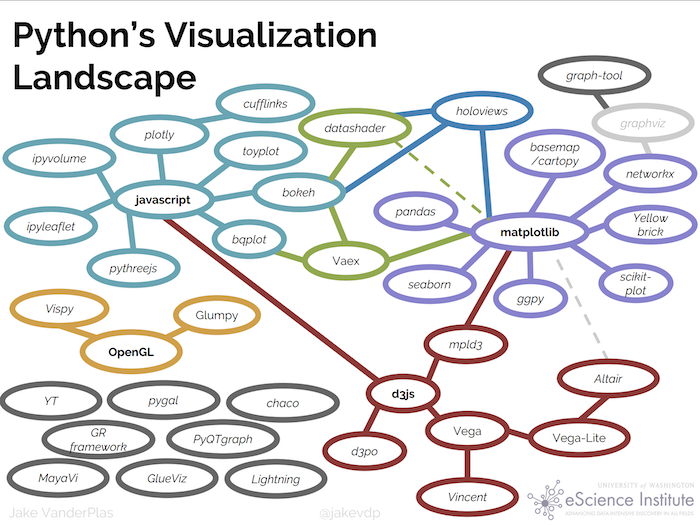

## 1.1 Import required packages

In [ ]:
%%capture 
# Data manipulation & general modules
import os
import numpy as np
import pandas as pd  

# Matplotlib
import matplotlib.pyplot as plt           # workhorse, infitily customizable

# Exploratory plots and Explanatory plots

**The core concept for today** is that visulazations in data analysis fall into two categories: plots that help you understand your data, and plots that help your reader understand your story. Exploration always comes before explaning. 

"In turning over 100 rocks, you may find 1 or 2 precious gemstones."

The objective of today's content is meant to help you create your exploratory plots as quick and effectively as possible, so you can take advantage of the tools hand.  

**Warning**: don't think that because a plot is more complex that it is inherently better. The opposite is more often true. Showing your result in the simplest way possible will make the figure easier to interpret and more powerful. 

# Section 2: `seaborn`

`seaborn` is a Python data visualization library based on `matplotlib`. It provides a high-level interface for drawing attractive and informative statistical graphics.

In [ ]:
# Statistical plotting for dataframes
import seaborn as sns                    
from scipy import stats     # if you want to fit a line in seaborn plots

## 2.1 Save lines and time

First, let's load an example dataframe from the `seaborn` library. 

In [ ]:
tips = sns.load_dataset("tips")
tips.head()

Here we have a dataframe with data on tips for various meals eaten in a restaurant.

Say we want to make a scatter plot of `tip` vs. `total_bill` for smokers and non-smokers. If we use `matplotlib`, the code looks like this.

In [ ]:
plt.figure()
# Load the smoker data
x_smoke = tips[tips.smoker=='Yes']['total_bill']
y_smoke = tips[tips.smoker=='Yes']['tip']
# Load the non-smoker data
x_nosmo = tips[tips.smoker=='No']['total_bill']
y_nosmo = tips[tips.smoker=='No']['tip']
# Plot the data
plt.scatter(x_smoke, y_smoke, c='yellow', label = 'Smoker')
plt.scatter(x_nosmo, y_nosmo, c='blue', label = 'Non-smoker')
# Label the plot
plt.xlabel('total bill')
plt.ylabel('tip')
plt.legend()
plt.show()

Now, if we want to make the same plot utilizing the advantages of `seaborn`, all we have to do is:

In [ ]:
sns.relplot(data = tips, x = "total_bill", y = "tip", hue = "smoker")
# `relplot` stands for "relation plot". Note the `hue` input ^ which colors the data
plt.show()

We just cut down our code length by 90%! And, as our plotting desires grow, we'll save even more time not having to worry about all the explicit plotting that `matplotlib` requires.

## 2.2 Plot themes

`seaborn` comes with a bunch of plotting themes to choose from.

In [ ]:
# Make a dataframe of sample data
df=pd.DataFrame({'x': range(1,11), 'y1': np.random.randn(10), 'y2': np.random.randn(10)+range(1,11), 
                 'y3': np.random.randn(10)+range(11,21), 'y4': np.random.randn(10)+range(6,16), 
                 'y5': np.random.randn(10)+range(4,14), 'y6': np.random.randn(10)+range(2,12), 
                 'y7': np.random.randn(10)+range(5,15), 'y8': np.random.randn(10)+range(4,14) })
 
# All the possibility of style in matplotlib and seaborn
possibilities = [u'seaborn', u'classic', u'dark_background', 
                 u'ggplot', u'fivethirtyeight', u'seaborn-colorblind',
                 u'seaborn-whitegrid', u'seaborn-white', u'seaborn-dark']
 
# Initialise figure
plt.figure(figsize = (10, 10))
# One chart per possibility:
for n, v in enumerate(possibilities):
    plt.style.use(v)             # I set the new style
    plt.subplot(3 ,3, n + 1)     # Start new place in the figure
    for column in df.drop('x', axis=1): plt.plot(df['x'], df[column], marker='', linewidth=1, alpha=0.4)
    plt.plot(df['x'], df['y5'], marker='', color='orange', linewidth=4)
    plt.title(v, fontsize=10, fontweight=0, color='grey', loc='left')
    plt.tick_params(labelbottom = False)
    plt.tick_params(labelleft = False)

In [ ]:
#set YOUR default style for ALL seaborn and matplotlib plots
plt.style.use('seaborn')

# Reset to default settings
plt.rcParams.update(plt.rcParamsDefault)

## 2.3 ``facet`` the plots

By combining the `hue` and `col` arguments of `relplot`, we can further explore our data through faceted plots.

In [ ]:
sns.relplot(data = tips,
            x = "total_bill",   # X variable
            y = "tip",          # Y variable
            hue = "smoker",     # color variable
            col = "time",       # column variable
            )

## 2.4 Categorical Data

We can plot categorical data using `catplot`. Let's look at how much the `total_bill` usually is based on the day of the meal.

In [ ]:
sns.catplot(data = tips,
            x = "day", 
            y = "total_bill", 
            kind = "box", 
            )

We can change the type of `catplot` with the `kind` argument. Now let's look at the amount of the `tip` based on the `size` of the dining party. And let's distinguish between the Lunch and Dinner crowds in a facet plot.

In [ ]:
sns.catplot(data = tips,
            x = "size", 
            y = "tip", 
            kind = "violin",
            col = 'time'
            )

We can see that most of our data comes from Dinner parties of 2-5 people in size. All of that with a single line of code!

## 2.5 Distributions

We can also explore distributions of our data using `distplot`.

In [ ]:
# distribution plot
sns.distplot(tips.tip, 
             kde = True,         # Show the kernel density estimate (blue line)
             bins = 50, 
             fit = stats.gamma,  #Fit a gamma distribution (black line) to your data. 
                                 #You have to know something about the distribution 
                                 #to choose the correct fit. 
             )   

List of possible statistical fits: https://docs.scipy.org/doc/scipy/reference/stats.html

We can also examine distributions along two axes using `jointplot`

In [ ]:
## Bi-variate distribution
sns.jointplot(data = tips, 
              x = "total_bill", 
              y = "tip",  
              kind = "kde",
              cmap = 'Reds'     # Specify the colormap of the jointplot
              )

## 2.6 Explore data with a ``pairplot``

Finally for `seaborn`, we can also explore our data along any number of dimensions by using a `pairplot`. Note that for this to work, the data need to be numerical.
A `pairplot` plots your data across all appropriate dimensions. 

For this example, we'll load a larger dataset that has data on the characteristics of different flowers.

In [ ]:
iris = sns.load_dataset('iris')

sns.pairplot(data = iris, 
             hue = 'species', 
             height = 1.5
             )

How long do you think it would take you to make this plot using only `matplotlib` commands?

Time for a check-in for `seaborn`.

## 2.7 Check-in 1
Create a pairplot in **CELL 1** to determine the *best* corelation in the  `penguins` dataset (visual inspection is fine). 

Then in **CELL 2**, plot those two vars by themselves, colored by `species` with each `sex` in a separate column.

In [ ]:
penguins = sns.load_dataset('penguins')
penguins.head() 

In [ ]:
# CELL 1
# WRITE YOUR CODE HERE #

In [ ]:
# CELL 2
# WRITE YOU CODE HERE #


## 2.8 EXTRA - heatmap (for gridded data)

`seaborn` is also capable of plotting heatmaps across two-dimensions in the dataframe. 

**Note**: it can also do this with a two-dimensional array.



In [ ]:
flights = sns.load_dataset("flights")
flights.head()

In [ ]:
flights = flights.pivot("month", "year", "passengers")
fig = sns.heatmap(flights)

## 2.9 That's `seaborn`!

We've looked at a way of quickly making plots from our dataframes with `seaborn`.

Next, we'll work with a package that allows us to do **interactive plotting** and get a little more ambitious with our visualization.

**Link** for more on `seaborn`
* https://seaborn.pydata.org/tutorial.html

# Section 3: `Plotly Express` 

"`plotly express` is a high-level Python visualization library: it’s a wrapper for `plotly.py` that exposes a simple syntax for complex charts. Inspired by `seaborn` and `ggplot2`, it was specifically designed to have a terse, consistent and easy-to-learn API: with just a single import, you can make richly interactive plots in just a single function call, including faceting, maps, animations, and trendlines."

In [ ]:
import plotly.express as px

In [ ]:
# Here are your commands to save figures. 
# Saving to an HTML will keep your figure interactive

#fig.write_image("path-to-image") #png, jpeg, pdf, svg
#fig.write_html("path-to-html") #html extension

## 3.1 Interactive plotting

Using interactive plotting, you're no longer stuck with a static image. 

Basic `plotly express` visulations look  similar to those of `seaborn`, but the commands have different names. For example, the `sns.relplot()` command from `seaborn` is known as `px.scatter()` in `plotly express`. 

You can hover over chosen data points with your cursor to further get a sense of your data. Click on the categories in the legend to filter which sections of the data you want to show. 


In [ ]:
iris = px.data.iris()
iris.head()

In [ ]:
fig = px.scatter(iris, x="sepal_width", y="sepal_length", color="species")
fig.show()

Pairplots: `sns.pairplot()` is translated to `px.scatter_matrix()`.

In [ ]:
fig = px.scatter_matrix(iris, 
                        dimensions=["sepal_width", "sepal_length", 
                                    "petal_width", "petal_length"], 
                        color="species")
fig.show()

## 3.2 EXTRA - Vast possibilities

There are a lot of possibilities you can do in `plotly express` without too much code. Let's look at how fancy we can get with the following example. Remember we can hover over all the data represented in this plot.

In [ ]:
fig = px.scatter(iris, 
                 x="sepal_width", 
                 y="sepal_length", 
                 color="species", 
                 marginal_y="violin",
                 marginal_x="box", 
                 trendline="ols", 
                 template="simple_white")
fig.show()

## 3.3 Hovering information

Interactive plotting comes in handy when your data is even further categorized than you can show. For instance, the following example will plot life expectancy vs. GDP for countries in the world. Coloring them by continent, we get an idea of the distribution around the world. But if we hover, we can note the specific countries with data points of interest.

In [ ]:
gapminder = px.data.gapminder()
gapminder.head()

In [ ]:
fig = px.scatter(gapminder.query("year==2007"), 
                 x="gdpPercap", 
                 y="lifeExp", 
                 size="pop",            # Size the data by the country's population
                 color="continent",     # Color the data by continent
                 hover_name="country",  # Show the country name when hovering
                 log_x=True,            # log the X-axis
                 size_max=60)           # Declare a maximum size for the plot
fig.show()

## 3.3 Animating your data

The advantages of interactive plotting go even further. With the `animation_frame` and `animation_group` arguments in our plotting function, we can create widget that allows us to move through time in our data.

In [ ]:
fig = px.scatter(gapminder, x="gdpPercap", y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
                 size="pop", 
                 color="continent", 
                 hover_name="country",
                 log_x=True, 
                 size_max=45, 
                 range_x=[100,100000], 
                 range_y=[25,90])
fig.show()

## 3.4 EXTRA - `facet` the plots **with** animation

Just like in `seaborn`, we can also use facet plots to further sort our data. This can be done in `plotly express` by using the `facet_col` argument.

In [ ]:
fig = px.scatter(gapminder, x="gdpPercap", y="lifeExp", 
                 animation_frame="year", 
                 animation_group="country",
           size="pop", color="continent", hover_name="country", facet_col="continent",
           log_x=True, size_max=45, range_x=[100,100000], range_y=[25,90])
fig.show()

## 3.5 EXTRA - more heatmaps

You can also do heatmaps in `plotly express`.

In [ ]:
iris = px.data.iris()
fig = px.density_heatmap(iris, 
                         x="sepal_width", 
                         y="sepal_length", 
                         marginal_x="rug", 
                         marginal_y="histogram")
fig.show()

## 3.6 Geographical data

Now we get to the major advantage that `plotly express` allows for dataframes that include geographic data. Let's work through this example of plotting data for a carsharing service.

Once the plot is shown, you can zoom, drag, and hover all around the map to view your data points.

In [ ]:
carshare = px.data.carshare()
carshare.head()

In [ ]:
fig = px.scatter_mapbox(carshare, 
                        lat="centroid_lat",
                        lon="centroid_lon",  
                        color="peak_hour",  
                        size="car_hours",  
                        color_continuous_scale=px.colors.cyclical.IceFire, 
                        size_max=15, 
                        zoom=10,
                        mapbox_style="carto-positron")
fig.show()

We can do the same if our geographic data is coded by country instead of latitude and longitude. Let's return to our gapminder data and look at population sizes

In [ ]:

gapminder = px.data.gapminder()
fig = px.scatter_geo(gapminder, 
                     locations="iso_alpha", 
                     color="continent", 
                     hover_name="country", 
                     size="pop",
                     animation_frame="year", 
                     projection="natural earth")
fig.show()

## 3.7 Plotting with shape files

If we want our data to fill the geographic areas that they are assigned to, we can do that by using the `px.choropleth()` command.

And we can animate that too.

In [ ]:
gapminder = px.data.gapminder()
fig = px.choropleth(gapminder, 
                    locations="iso_alpha", 
                    color="gdpPercap", 
                    hover_name="country", 
                    animation_frame="year", 
                    range_color=[250,25000])
fig.show()

## 3.8 Check-in 2

Let's synthesize what we've learned in this check-in. For this exercise, I want you to:

1. Load the gapminder data from `plotly express`.
2. Rescale it so that life expectancy is given as the number of years below or above 50.
3. Make a global plot of that value and animate it by the year.
4. Specificy the colormap with the `color_continuous_scale` arugment (see section 3.6). Here's a list of options:
* Ice-Fire: `px.colors.cyclical.IceFire`
* Viridis: `px.colors.sequential.Viridis`
* Purple-Green: `px.colors.diverging.PRGn`


In [ ]:
gapminder = px.data.gapminder()
# WRITE YOUR CODE HERE #

## 3.9 EXTRA - 3D data

You can also plot 3D data in `plotly express`.

In [ ]:
df = px.data.election()
fig = px.scatter_3d(df, x="Joly", y="Coderre", z="Bergeron", color="winner", size="total", hover_name="district",
                  symbol="result", color_discrete_map = {"Joly": "blue", "Bergeron": "green", "Coderre":"red"})
fig.show()

**Links** for more on `plotly express`
* https://plotly.com/python/plotly-express/
* https://www.plotly.express/plotly_express/

# Section 4: `Xarray` plotting

We have now learned about two powerful plotting packages for working with tabular data (i.e. dataframes). Now let's look at some packages that help us make quick, pretty visuals for gridded data. The first package we'll learn about is the native plotting package of `xarray`. This is a wrapper of `matplotlib` that implicitly uses all of the information in an xarray dataset to create detailed plots in no time.

For these examples we’ll use the North American air temperature dataset.

In [ ]:
%%capture
!pip install xarray --upgrade
import xarray as xr

In [ ]:
airtemps = xr.tutorial.open_dataset("air_temperature")
airtemps

In [ ]:
air = airtemps.air - 273.15
air.attrs = airtemps.air.attrs
air.attrs["units"] = "deg C"

## 4.1 One-dimensional plots

The simplest way to make a plot is to call the `DataArray.plot()` method.

In [ ]:
air1d = air.isel(lat=10, lon=10)
air1d.plot()

xarray uses the coordinate name along with metadata (if available) to label the axes.

In [ ]:
air1d.attrs

## 4.2 Additional Arguments
Additional arguments are passed directly to the matplotlib function which does the work. For example, `xarray.plot.line()` calls matplotlib.pyplot.plot passing in the index and the array values as x and y, respectively. So to make a line plot with purple circles, we can use keyword arguments as we would in `matplotlib`:

In [ ]:
air1d[:200].plot.line(color="purple", marker="o")

`matplotlib` format strings can also be used, and are more implicit. The format string below creates a line plot with blue triangles.



In [ ]:
air1d[:200].plot.line("b-^")

## 4.3 Adding to Existing Axis
To add the plot to an existing axis pass in the axis as a keyword argument `ax`. This works for all xarray plotting methods. In this example `axes` is an array consisting of the left and right axes created by `plt.subplots`.

In [ ]:
import matplotlib.pyplot as plt

In [ ]:
fig, axes = plt.subplots(ncols=2)
axes
air1d.plot(ax=axes[0])
air1d.plot.hist(ax=axes[1])
plt.tight_layout()
plt.draw()

## 4.4 Multiple lines showing variation along a dimension

It is possible to make line plots of two-dimensional data by calling `xarray.plot.line()` with appropriate arguments. Consider the 3D variable `air` defined above. We can use line plots to check the variation of air temperature at three different latitudes along a longitude line:

In [ ]:
air.isel(lon=10, lat=[19, 21, 22]).plot.line(x="time")

It is required to explicitly specify either

* `x`: the dimension to be used for the x-axis, or

* `hue`: the dimension you want to represent by multiple lines.

Thus, we could have made the previous plot by specifying `hue='lat'` instead of `x='time'`.

In [ ]:
air.isel(lon=10, lat=[19, 21, 22]).plot.line(hue="lat")

## 4.5 EXTRA - Dimension along y-axis

It is also possible to make line plots such that the data are on the x-axis and a dimension is on the y-axis. This can be done by specifying the appropriate y keyword argument.

In [ ]:
air.isel(time=10, lon=[10, 11]).plot(y="lat", hue="lon")

## 4.6 Two-dimensional plots

The default method `DataArray.plot()` calls x`array.plot.pcolormesh()` by default when the data is two-dimensional.

In [ ]:
air2d = air.isel(time=500)
air2d.plot()

All 2d plots in xarray allow the use of the keyword arguments `yincrease` and `xincrease`.

In [ ]:
air2d.plot(yincrease=False)

## 4.7 EXTRA - Missing Values

`xarray` plots data with missing values.

In [ ]:
import numpy as np

In [ ]:
bad_air2d = air2d.copy()

bad_air2d[dict(lat=slice(0, 10), lon=slice(0, 25))] = np.nan

bad_air2d.plot()

## 4.8 EXTRA - Calling Matplotlib

Since this is a thin wrapper around `matplotlib`, all the functionality of `matplotlib` is available.

In [ ]:
air2d.plot(cmap=plt.cm.Blues)

plt.title("These colors prove North America\nhas fallen in the ocean")

plt.ylabel("latitude")

plt.xlabel("longitude")

plt.tight_layout()

plt.draw()

**Note**: any kind of updates to the plot should be done *after* the call to the `xarray`’s plot. Else, the updates will be masked over by the `xarray` default display.

## 4.9 EXTRA - Xarray colormaps

`xarray` borrows logic from `Seaborn` to infer what kind of color map to use. For example, consider the original data in Kelvins rather than Celsius:

In [ ]:
airtemps.air.isel(time=0).plot()

The Celsius data contain 0, so a diverging color map was used. The Kelvins do not have 0, so the default color map was used.

We can also specify the colormap we want by inputting the `matplotlib` keyword `cmap`

In [ ]:
airtemps.air.isel(time=0).plot(cmap='Reds')

## 4.10 EXTRA - Robust plots
Outliers often have an extreme effect on the output of the plot. Here we add two bad data points. This affects the color scale, washing out the plot.

In [ ]:
air_outliers = airtemps.air.isel(time=0).copy()

air_outliers[0, 0] = 100

air_outliers[-1, -1] = 400

air_outliers.plot()

This plot shows that we have outliers. The easy way to visualize the data without the outliers is to pass the parameter `robust=True`. This will use the 2nd and 98th percentiles of the data to compute the color limits.

In [ ]:
air_outliers.plot(robust=True)

The arrows on the color bar indicate that the colors include data points outside the bounds.

## 4.11 EXTRA - Discrete Colormaps

It is often useful, when visualizing 2d data, to use a discrete colormap, rather than the default continuous colormaps that `matplotlib` uses. The `levels` keyword argument can be used to generate plots with discrete colormaps. For example, to make a plot with 8 discrete color intervals:

In [ ]:
air2d.plot(levels=8)

In [ ]:
# It is also possible to use a list of levels to specify the boundaries of the discrete colormap:
air2d.plot(levels=[0, 12, 18, 30])

In [ ]:
# You can also specify a list of discrete colors through the colors argument
flatui = ["#9b59b6", "#3498db", "#95a5a6", "#e74c3c", "#34495e", "#2ecc71"]
air2d.plot(levels=[0, 12, 18, 30], colors=flatui)

Finally, if you have `Seaborn` installed, you can also specify a `seaborn` color palette to the `cmap` argument. Note that `levels` *must* be specified with `seaborn` color palettes if using `imshow` or `pcolormesh` (but not with `contour` or `contourf`, since `levels` are chosen automatically).

In [ ]:
air2d.plot(levels=10, cmap="husl")
plt.draw()

## 4.12 Facet plotting

Faceting here refers to splitting an array along one or two dimensions and plotting each group. xarray’s basic plotting is useful for plotting two dimensional arrays. What about three or four dimensional arrays? That’s where facets become helpful. The general approach to plotting here is called “small multiples”, where the same kind of plot is repeated multiple times, and the specific use of small multiples to display the same relationship conditioned on one ore more other variables is often called a “trellis plot”.

Consider the temperature data set. There are 4 observations per day for two years which makes for 2920 values along the time dimension. One way to visualize this data is to make a separate plot for each time period.

The faceted dimension should not have too many values; faceting on the time dimension will produce 2920 plots. That’s too much to be helpful. To handle this situation try performing an operation that reduces the size of the data in some way. For example, we could compute the average air temperature for each month and reduce the size of this dimension from 2920 -> 12. A simpler way is to just take a slice on that dimension. So let’s use a slice to pick 6 times throughout the first year.

In [ ]:
t = air.isel(time=slice(0, 365 * 4, 250))
t.coords

The easiest way to create faceted plots is to pass in `row` or `col` arguments to the `xarray` plotting methods/functions. This returns a `xarray.plot.FacetGrid` object.

In [ ]:
g_simple = t.plot(x="lon", y="lat", col="time", col_wrap=3)

In [ ]:
# Faceting also works for line plots
g_simple_line = t.isel(lat=slice(0, None, 4)).plot(x="lon", hue="lat", col="time", col_wrap=3)

## 4.13 EXTRA - Other features

Faceted plotting supports other arguments common to `xarray` 2d plots.

In [ ]:
hasoutliers = t.isel(time=slice(0, 5)).copy()

hasoutliers[0, 0, 0] = -100

hasoutliers[-1, -1, -1] = 400

g = hasoutliers.plot.pcolormesh("lon", "lat", 
                                col="time", 
                                col_wrap=3, 
                                robust=True, 
                                cmap="viridis", 
                                cbar_kwargs={"label": "this has outliers"})

## 4.14 Datasets
`xarray` has limited support for plotting Dataset variables against each other. Consider this dataset:

In [ ]:
ds = xr.tutorial.scatter_example_dataset()
ds

Suppose we want to scatter `A` against `B`

In [ ]:
ds.plot.scatter(x="A", y="B")

In [ ]:
# The `hue` kwarg lets you vary the color by variable value
ds.plot.scatter(x="A", y="B", hue="w")

In [ ]:
# Faceting is also possible
ds.plot.scatter(x="A", y="B", col="x", row="z", hue="w", hue_style="discrete")

## 4.15 Maps

With the inclusion of the `cartopy` package, we can also do xarray plots with map boundaries shown on the plot. A huge advantage when you need some grounding as to where your data is physicall located.

In [ ]:
%%capture 
import cartopy.crs as ccrs
import cartopy.feature as cfeature

Here, we'll make a plot of our North American temperature data and use the cartopy projection to show where our grid is located.

In [ ]:
plt.figure(figsize=(10,10))

air = xr.tutorial.open_dataset("air_temperature").air

p = air.isel(time=0).plot(
    subplot_kws=dict(projection=ccrs.Orthographic(-80, 35), facecolor="gray"), transform=ccrs.PlateCarree()
    )

p.axes.set_global()

p.axes.coastlines()

When faceting on maps, the projection can be transferred to the plot function using the `subplot_kws` keyword. The axes for the subplots created by faceting are accessible in the object returned by plot:

In [ ]:
p = air.isel(time=[0, 4]).plot(transform=ccrs.PlateCarree(),col="time",subplot_kws={"projection": ccrs.Orthographic(-80, 35)})

for ax in p.axes.flat:
    ax.coastlines()
    ax.gridlines()

plt.draw()

## 4.16 Check-in 3

To recap our xarray plotting knowledge, let's do the following:
1. Rescale the temperature data to Celcius
2. Plot the last 4 days in a facet plot that's 2x2

In [ ]:
air = xr.tutorial.open_dataset("air_temperature")['air']
# WRITE YOUR CODE HERE #

# Section 5: Geoviews

`geoviews` also handles gridded data, but provides the ability for **interactive plotting**. Like `plotly express`, a major advantage is being able to animate data in time. 

In [ ]:
import geoviews as gv
import geoviews.feature as gf
from cartopy import crs as ccrs

## 5.1 Animating gridded data.

To start off, let's take the air temperature data we worked with in `xarray` and plot a few days in `geoviews`.

In [ ]:
airtemps = xr.tutorial.open_dataset("air_temperature")['air']   # Load the data
gv.extension('bokeh')                                           # Establish the backend
dataset = gv.Dataset(airtemps.isel(time=slice(0,15)),   
                     ['lon', 'lat', 'time'], 'air')             # Turn the dataset geoviews friendly
images = dataset.to(gv.Image)                                   # Get image from geoviews dataset
images.opts(projection = ccrs.PlateCarree(),
            cmap='viridis', colorbar=True, 
            width=700, height=500) * gf.coastline               # Add plotting arguments and coastline

## 5.2 Going global [Code Not Working in Jupyter Notebook]

Now we can try the same thing with some global data. This is a lot to load, so don't fret if it takes a minute.

In [ ]:
import cartopy.crs as ccrs, cartopy.feature as cfeature
import matplotlib.pyplot as plt, geoviews as gv, geoviews.feature as gf
from geoviews import opts
import numpy as np; import pandas as pd, xarray as xr
import zarr, gcsfs

In [ ]:
gcs = gcsfs.GCSFileSystem(token='anon')

In [ ]:
df = pd.read_csv('https://storage.googleapis.com/cmip6/cmip6-zarr-consolidated-stores.csv')
df = df.query("activity_id=='ScenarioMIP' & variable_id == 'tas' & experiment_id == 'ssp585' & source_id == 'IPSL-CM6A-LR' & table_id == 'day'")
ds = xr.open_dataset( gcs.get_mapper( df.zstore.values[0] ),engine="zarr")
ds = ds - 273.15

Let's try global plot with a different `projection` argument.

In [ ]:
gv.extension('bokeh')
dataset = gv.Dataset( ds.isel( time=slice(0,5) ), ['lon', 'lat', 'time'], 'tas')
images = dataset.to( gv.Image )
images.opts(projection = ccrs.Robinson(),
            cmap='viridis', colorbar=True, 
            width=700, height=500) * gf.coastline 

## 5.3 EXTRA - Contour plots

We can do contour plots if we want to as well. Note that in this example we don't specify a projection, this is to show the default map.

In [ ]:
gv.extension('bokeh')
dataset = gv.Dataset(ds.isel( time=slice(0,5) ), kdims=['lon', 'lat', 'time'], vdims=['tas'])
images = dataset.to(gv.FilledContours,['lon', 'lat'])
images.opts(colorbar=True, width=700, height=500 ) * gf.coastline

## 5.4 EXTRA - Rescaling and projection

In this example we rescale the colorbar using the `redim` method and change the projection to Orthographic. 

In [ ]:
gv.extension('bokeh')
dataset = gv.Dataset( ds.isel( time=slice(0,5) ), ['lon', 'lat', 'time'], 'tas').redim.range( tas = (-40, 40) )
images = dataset.to( gv.Image )
images.opts(projection= ccrs.Orthographic(central_longitude=-80, central_latitude=35) , 
            cmap='seismic', 
            colorbar=True, 
            width=500, 
            height=500 ) * gf.coastline

## 5.5 Check-in 4

Last check-in for today. Let's work with `geoviews`. 

Create a plot showing:
1. The first two weeks of the `ds` dataset (14 days total)
2. A Mollweide projection `ccrs.Mollweide()`
3. The colorbar rescaled from -50 to +50 and using the `seismic` colormap

In [ ]:
# WRITE YOUR CODE HERE #

**Links**
* https://geoviews.org/user_guide/Gridded_Datasets_I.html
* https://geoviews.org/user_guide/Gridded_Datasets_II.html

# That's it for today! 

Today we learned a bit about how to handle the helpful plotting packages. For tabular data we can use:
* `seaborn`
* `plotly express`
And for gridded data we can work with:
* `xarray`
* `geoviews`

You can learn more about these packages by following the links at the end of each section. 

Remember, these are packages to help you when making preliminary plots and presentation-style graphics. If you end up making plots to publish in a journal, we highly recommend that you work with `matplotlib` and `basemap`. You'll only need to work with them 5% of the time, which is why we covered the other libraries extensively, but they allow the most freedom when desigining a figure for your manuscript.

**Finally** if you have the time, please give this video a watch. It covers basic visualization theory and has been very helpful in guiding my thoughts as I create different figures: https://www.youtube.com/watch?v=6lm4wJ1qm0w


----------------------
----------------------
----------------------

# EXTRA CONTENT - Customization in `matplotlib`

Here are some extra customization features for `matplotlib` just to show you what's out there.

In [ ]:
# get a list of potenital plot parameters to modify 
plt.rcParams.keys

In [ ]:
%%capture
!pip install jupyterthemes

In [ ]:
### Controlling plot params
plt.rcParams.update({'font.size': 8, 'xtick.labelsize' : 8, 'ytick.labelsize' :8})
### and many more

### to modify plots for dark theme
from jupyterthemes import jtplot
jtplot.style(theme='monokai', context='notebook', ticks=True, grid=False)

### to plot white plots in dark theme
plt.style.use('dark_background')
import seaborn as sns
sns.set(context='paper', style='darkgrid', rc={'figure.facecolor':'white'}, font_scale=1.2)

## 7.1 Gridspec

One of the most useful customization features in `matplotlib` is having complete control of your subplots. Using the `Gridspec` library, these next few examples show how you can sort and size your subplots to your liking.

In [ ]:
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.gridspec as gridspec

In [ ]:
# Standard subplots in matplotlib
fig1, f1_axes = plt.subplots(ncols=2, nrows=2, constrained_layout=True)

In [ ]:
# The Gridspec equivalent of basic subplots
fig2 = plt.figure(constrained_layout=True)
spec2 = gridspec.GridSpec(ncols=2, nrows=2, figure=fig2)
f2_ax1 = fig2.add_subplot(spec2[0, 0])
f2_ax2 = fig2.add_subplot(spec2[0, 1])
f2_ax3 = fig2.add_subplot(spec2[1, 0])
f2_ax4 = fig2.add_subplot(spec2[1, 1])

In [ ]:
# You can set the different SUBPLOT instances by indexing the GS array
fig3 = plt.figure(constrained_layout=True)
gs = fig3.add_gridspec(3, 3)
f3_ax1 = fig3.add_subplot(gs[0, :])     # This subplot takes the FIRST row and ALL the columns
f3_ax1.set_title('gs[0, :]')
f3_ax2 = fig3.add_subplot(gs[1, :-1])   # This subplot takes the SECOND row and the FIRST TWO columns
f3_ax2.set_title('gs[1, :-1]')
f3_ax3 = fig3.add_subplot(gs[1:, -1])
f3_ax3.set_title('gs[1:, -1]')
f3_ax4 = fig3.add_subplot(gs[-1, 0])
f3_ax4.set_title('gs[-1, 0]')
f3_ax5 = fig3.add_subplot(gs[-1, -2])
f3_ax5.set_title('gs[-1, -2]')

Here's an example showing how you can make your own version of a scatter-distribution plot. A default version of this can be used with the `seaborn.jointplot()` function with tabulated data.

In [ ]:
# Create some normally distributed data
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

## 7.2 Colormaps

There is an ENORMOUS number of possible colors and colormaps to use in `matplotlib`. 

**Links**:
* https://matplotlib.org/users/colormaps.html
* http://colorbrewer2.org/#type=diverging&scheme=Spectral&n=11

In [ ]:
########### User segmented colormap ###########################
def segcolor(cmap, num_level, diverge = True, preview = False):
    # Discretizes one of python's built-in continious colormaps at any number of levels you choose
    # cmap: plt.cm.*name of colormap*  (CaSe SeNsiTiVe!!) 
    # num_level: int, number of segments you want in your colormap, if diverging... number on each side of midpoint
    colormap = []
    for i in range(cmap.N): colormap.append(rgb2hex(cmap(i)[:3]))                                        # will return rgba, we take only first 3 so we get rgb
    colormap = np.array(colormap).reshape((1, len(colormap))).flatten()

    if diverge == True:
        low  = colormap[np.round(np.linspace(0, 126, num_level+1)).astype(int)].tolist()
        high = colormap[np.round(np.linspace(127, len(colormap) - 1, num_level+1)).astype(int)].tolist()
        colorout = np.hstack([low[:-1],'white',high[1:]]).tolist()

    else: colorout = colormap[np.round(np.linspace(0, len(colormap) - 1, num_level)).astype(int)].tolist()

    if preview == True:
        fig = plt.figure(figsize=((len(colorout)-1)/2,0.5))
        for i in range(len(colorout)): 
            plt.scatter(i, 0, facecolor = colorout[i], edgecolor = 'black', s = 500, marker = 's')
        plt.yticks([])
        plt.xticks([])
        plt.xlim(-0.51, i+0.5)
        plt.show()
    else: pass
    return(colorout)

### *GOOD* Colormaps ###
### Diverging
x = segcolor(plt.cm.Spectral, 5, True, True)
x = segcolor(plt.cm.BrBG, 5, True, True)
x = segcolor(plt.cm.RdBu, 5, True, True)

### Sequential
x = segcolor(plt.cm.viridis, 11, False, True)
x = segcolor(plt.cm.inferno, 11, False, True)
x = segcolor(plt.cm.cubehelix, 11, False, True)

In addition to all these options, you can create your own colormap with the help of https://colorbrewer2.org/

They also offer colormaps that are colorblind safe.

# Answers

### Answer 1

In [ ]:
# CELL 1
sns.pairplot(data = penguins, 
             hue = 'species', 
             height = 1.5
             )

In [ ]:
# CELL 2
sns.relplot(data = penguins, x = "flipper_length_mm", 
            y = "body_mass_g", hue = "species", col="sex")

### Answer 2

In [ ]:
gapminder = px.data.gapminder()
gapminder.head()
gapminder['lifeExp'] = gapminder['lifeExp'] - 50

fig = px.choropleth(gapminder, 
                    locations="iso_alpha", 
                    color="lifeExp", 
                    hover_name="country", 
                    animation_frame="year", 
                    range_color=[-30,30],
                    color_continuous_scale=px.colors.diverging.PRGn)
fig.show()

### Answer 3

In [ ]:
air = xr.tutorial.open_dataset("air_temperature")['air']
air = air - 273.15
answer_plot = air.isel(time=slice(-5,-1)).plot(x="lon", y="lat", col="time", col_wrap=2)

### Answer 4

In [ ]:
gv.extension('bokeh')
dataset = gv.Dataset( ds.isel( time=slice(0,14) ), ['lon', 'lat', 'time'], 'tas').redim.range( tas = (-50, 50) )
images = dataset.to( gv.Image )
images.opts(projection= ccrs.Mollweide() , 
            cmap='seismic', 
            colorbar=True, 
            width=700, 
            height=500 ) * gf.coastline